<a href="https://colab.research.google.com/github/BChun11/DATA3001/blob/main/DATA3001_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.3 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16672 sha256=665889230c2e0bcca3cd672b5ed1f7f4b9c12c3be5b9ad24765695bb7f3ecfaf
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
!git clone https://github.com/nokuik/KDDI-IoT-2019.git


Cloning into 'KDDI-IoT-2019'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 42 (delta 1), reused 9 (delta 1), pack-reused 33
Receiving objects: 100% (42/42), 776.84 MiB | 26.82 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (31/31), done.


In [4]:
# List all '.tar.gz files in ipfix directory
%cd KDDI-IoT-2019
%cd ipfix
!ls *.tar.gz

/content/KDDI-IoT-2019
/content/KDDI-IoT-2019/ipfix
 amazon_echo_gen2.tar.gz		        nature_remo.tar.gz
 au_network_camera.tar.gz		        panasonic_doorphone.tar.gz
 au_wireless_adapter.tar.gz		        philips_hue_bridge.tar.gz
 bitfinder_awair_breathe_easy.tar.gz	       'planex_camera_one_shot!.tar.gz'
 candy_house_sesami_wi-fi_access_point.tar.gz   planex_smacam_outdoor.tar.gz
 irobot_roomba.tar.gz			        planex_smacam_pantilt.tar.gz
 jvc_kenwood_cu-hb1.tar.gz		        powerelectric_wi-fi_plug.tar.gz
 jvc_kenwood_hdtv_ip_camera.tar.gz	        qrio_hub.tar.gz
 line_clova_wave.tar.gz			        sony_network_camera.tar.gz
 link_japan_eremote.tar.gz		        sony_smart_speaker.tar.gz
 mouse_computer_room_hub.tar.gz		        xiaomi_mijia_led.tar.gz


In [5]:
# List all tar.gz files and store them in a variable
files = !ls -1 *.tar.gz

# Extract each tar.gz file
for file in files:
    print(f"Extract {file} ")
    !tar -xzvf {file}

Extract amazon_echo_gen2.tar.gz 
amazon_echo_gen2.json
Extract au_network_camera.tar.gz 
au_network_camera.json
Extract au_wireless_adapter.tar.gz 
au_wireless_adapter.json
Extract bitfinder_awair_breathe_easy.tar.gz 
bitfinder_awair_breathe_easy.json
Extract candy_house_sesami_wi-fi_access_point.tar.gz 
candy_house_sesami_wi-fi_access_point.json
Extract irobot_roomba.tar.gz 
irobot_roomba.json
Extract jvc_kenwood_cu-hb1.tar.gz 
jvc_kenwood_cu-hb1.json
Extract jvc_kenwood_hdtv_ip_camera.tar.gz 
jvc_kenwood_hdtv_ip_camera.json
Extract line_clova_wave.tar.gz 
line_clova_wave.json
Extract link_japan_eremote.tar.gz 
link_japan_eremote.json
Extract mouse_computer_room_hub.tar.gz 
mouse_computer_room_hub.json
Extract nature_remo.tar.gz 
nature_remo.json
Extract panasonic_doorphone.tar.gz 
panasonic_doorphone.json
Extract philips_hue_bridge.tar.gz 
philips_hue_bridge.json
Extract 'planex_camera_one_shot!.tar.gz' 
planex_camera_one_shot!.json
Extract planex_smacam_outdoor.tar.gz 
planex_smacam

In [6]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List the contents of the current working directory
print("Contents of Current Directory:", os.listdir())

!cd

Current Working Directory: /content/KDDI-IoT-2019/ipfix
Contents of Current Directory: ['au_wireless_adapter.tar.gz', 'sony_bravia.tar.gz00', 'line_clova_wave.json', 'xiaomi_mijia_led.json', 'au_network_camera.tar.gz', 'line_clova_wave.tar.gz', 'sony_smart_speaker.json', 'philips_hue_bridge.json', 'amazon_echo_gen2.tar.gz', 'link_japan_eremote.json', 'bitfinder_awair_breathe_easy.tar.gz', 'i-o_data_qwatch.tar.gz01', 'bitfinder_awair_breathe_easy.json', 'planex_smacam_pantilt.tar.gz', 'i-o_data_qwatch.tar.gz00', 'candy_house_sesami_wi-fi_access_point.tar.gz', 'amazon_echo_gen2.json', 'jvc_kenwood_cu-hb1.json', 'planex_smacam_pantilt.json', 'nature_remo.json', 'sony_bravia.tar.gz01', 'au_network_camera.json', 'jvc_kenwood_cu-hb1.tar.gz', 'mouse_computer_room_hub.tar.gz', 'candy_house_sesami_wi-fi_access_point.json', 'sony_smart_speaker.tar.gz', 'jvc_kenwood_hdtv_ip_camera.json', 'sony_network_camera.tar.gz', 'au_wireless_adapter.json', 'link_japan_eremote.tar.gz', 'philips_hue_bridge.tar

In [7]:
#### Code to generate distinct tables for each json file using a limited subset

# Define the directory where the JSON files are located
json_directory = '/content/KDDI-IoT-2019/ipfix'

# Get the list of all JSON files in the directory
json_files = [f for f in os.listdir(json_directory) if f.endswith('.json')]

# Create distinct tables for each json file
tables = {}
for json_file in json_files:
    # strip .json suffix from device names
    device_name = json_file.split('.')[0]
    # Construct the full path to the JSON file
    json_path = os.path.join(json_directory, json_file)
    # Read the JSON file into a DataFrame, normalize the 'flows' column, and get the first 1000 rows
    df = pd.json_normalize(pd.read_json(json_path, lines=True, nrows=1000)['flows'])

    # Label the DataFrame with the device name
    df['Device'] = device_name
    tables[device_name] = df

# Concatenate all the Dataframes in the tables dictionary into a single Dataframe
df = pd.concat(tables.values(), ignore_index=True)
df.head()

,flowStartMilliseconds,flowEndMilliseconds,flowDurationMilliseconds,reverseFlowDeltaMilliseconds,protocolIdentifier,sourceIPv4Address,sourceTransportPort,packetTotalCount,octetTotalCount,flowAttributes,...,reverseNonEmptyPacketCount,reverseDataByteCount,reverseAverageInterarrivalTime,reverseFirstNonEmptyPacketSize,reverseLargePacketCount,reverseMaxPacketSize,reverseStandardDeviationPayloadLength,reverseStandardDeviationInterarrivalTime,reverseBytesPerPacket,Device
0,2019-06-25 08:36:41.276,2019-06-25 08:36:41.855,0.579,0.000,17,192.168.1.1,47452,2,156,01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,line_clova_wave
1,2019-06-25 08:37:43.962,2019-06-25 08:37:44.541,0.579,0.000,17,192.168.1.1,36500,2,156,01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,line_clova_wave
2,2019-06-25 08:38:33.938,2019-06-25 08:38:33.996,0.058,0.058,17,192.168.1.179,123,1,76,00,...,1.0,48.0,0.0,48.0,0.0,48.0,0.0,0.0,48.0,line_clova_wave
3,2019-06-25 08:38:46.701,2019-06-25 08:38:47.280,0.579,0.000,17,192.168.1.1,52465,2,156,01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,line_clova_wave
4,2019-06-25 08:39:49.253,2019-06-25 08:39:49.809,0.556,0.000,17,192.168.1.1,55452,2,156,01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,line_clova_wave


In [8]:
df['flowStartMilliseconds'] = pd.to_datetime(df['flowStartMilliseconds'])
df['flowEndMilliseconds'] = pd.to_datetime(df['flowEndMilliseconds'])

In [9]:
df.set_index('flowStartMilliseconds', inplace=True)
df.sort_index(inplace=True)

In [10]:
df.info

<bound method DataFrame.info of                             flowEndMilliseconds  flowDurationMilliseconds  \
flowStartMilliseconds                                                       
2019-06-25 08:36:11.510 2019-06-25 09:05:37.456                  1765.946   
2019-06-25 08:36:11.870 2019-06-25 09:06:11.771                  1799.901   
2019-06-25 08:36:13.307 2019-06-25 09:05:39.921                  1766.614   
2019-06-25 08:36:13.539 2019-06-25 08:36:13.984                     0.445   
2019-06-25 08:36:13.984 2019-06-25 08:36:14.319                     0.335   
...                                         ...                       ...   
2019-07-10 08:31:25.906 2019-07-10 08:31:25.906                     0.000   
2019-07-10 08:31:25.906 2019-07-10 08:31:25.906                     0.000   
2019-07-10 08:31:25.999 2019-07-10 08:31:25.999                     0.000   
2019-07-10 08:31:26.088 2019-07-10 08:31:26.088                     0.000   
2019-07-10 08:31:26.088 2019-07-10 08:31:26.

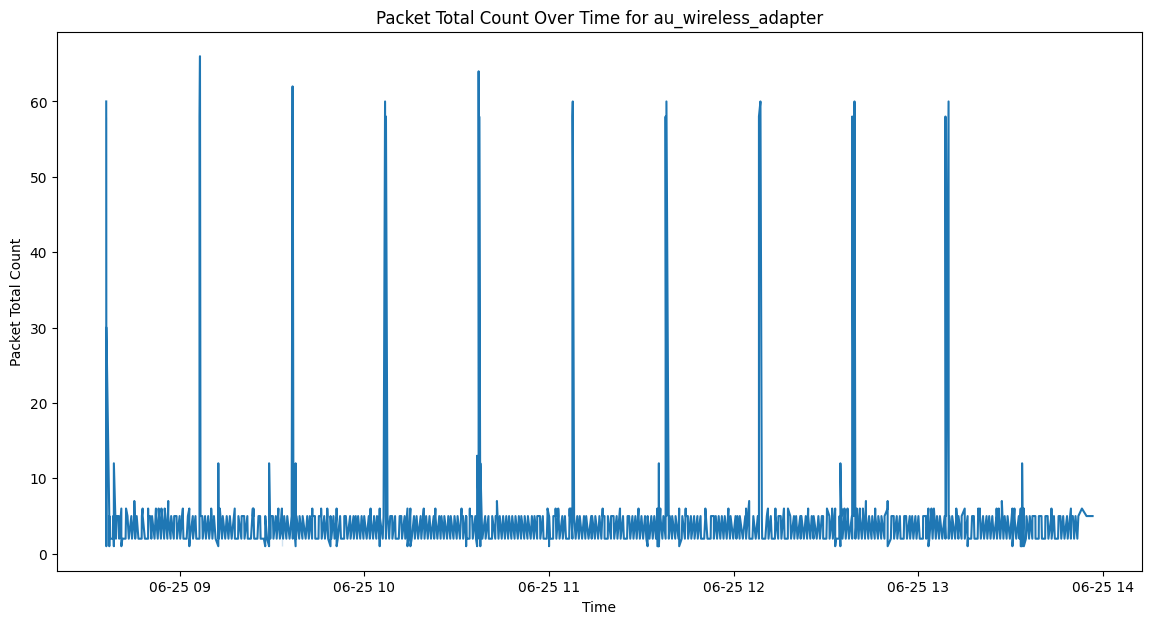

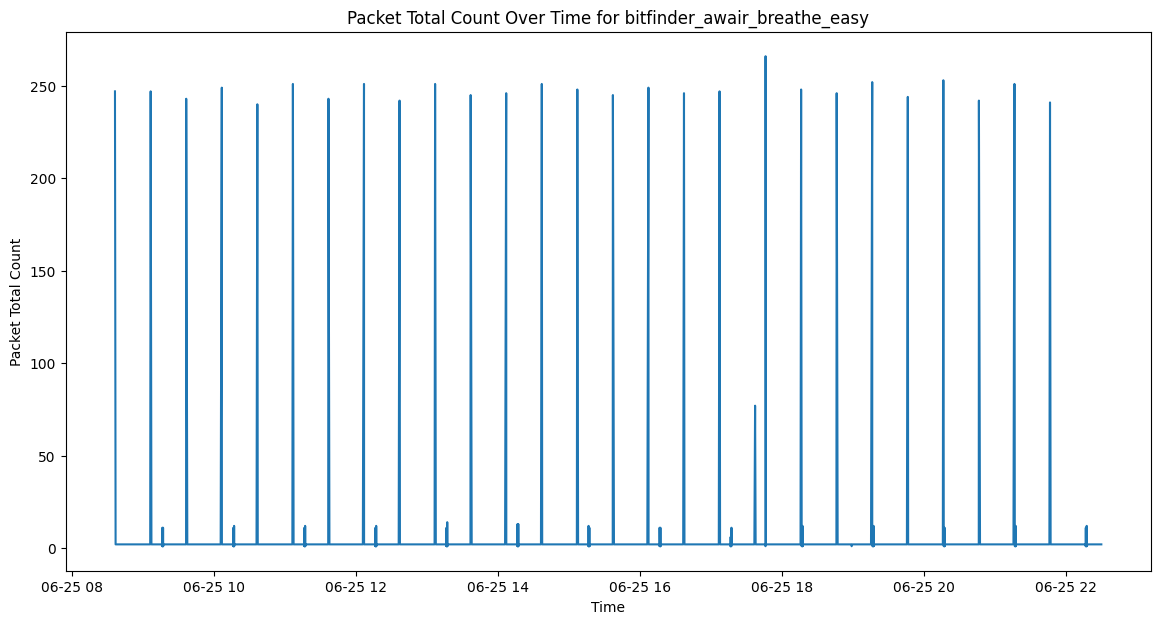

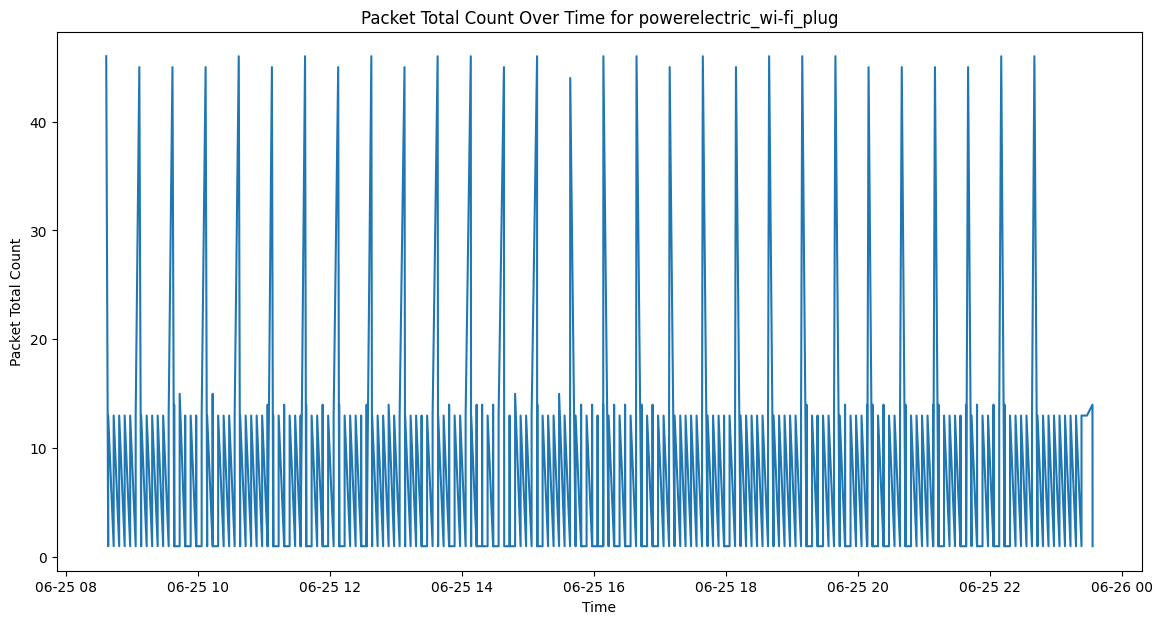

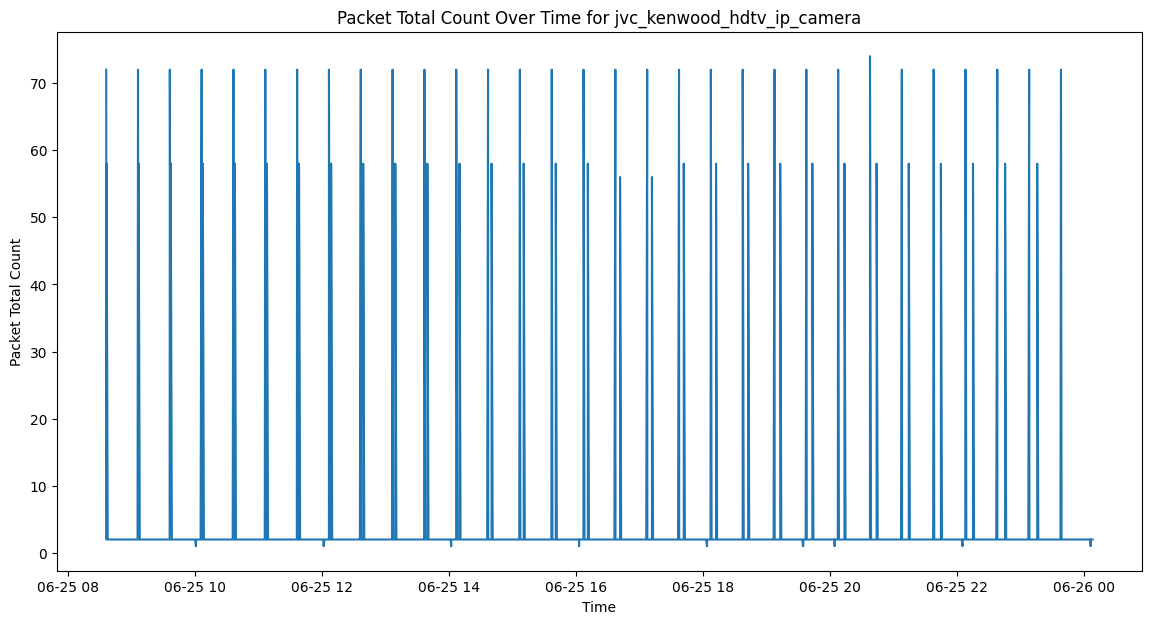

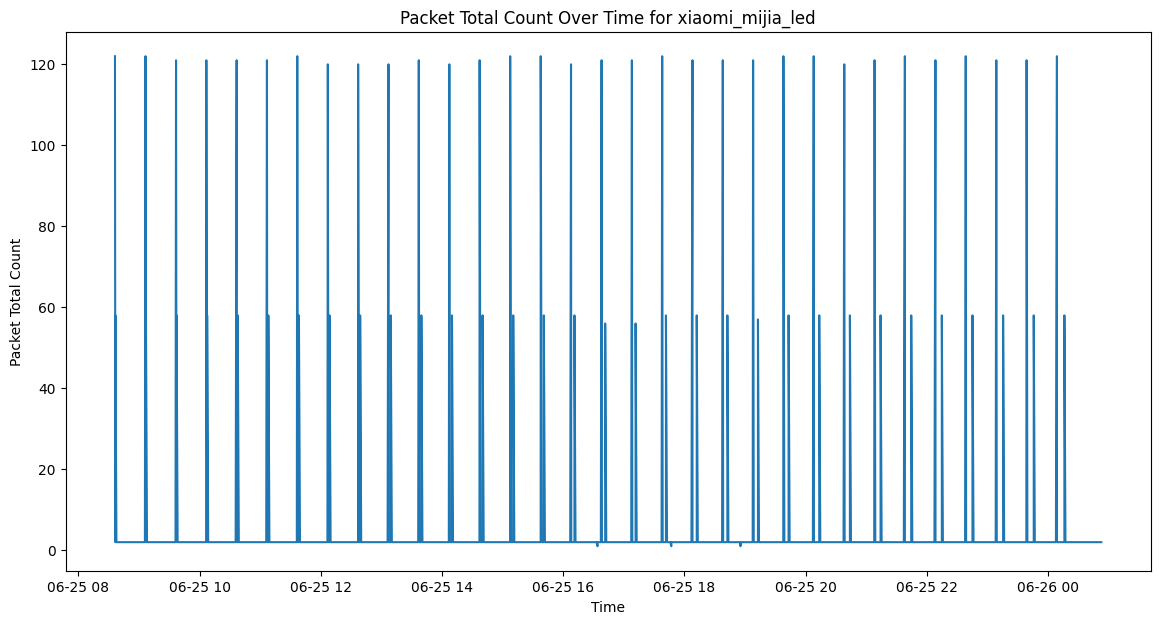

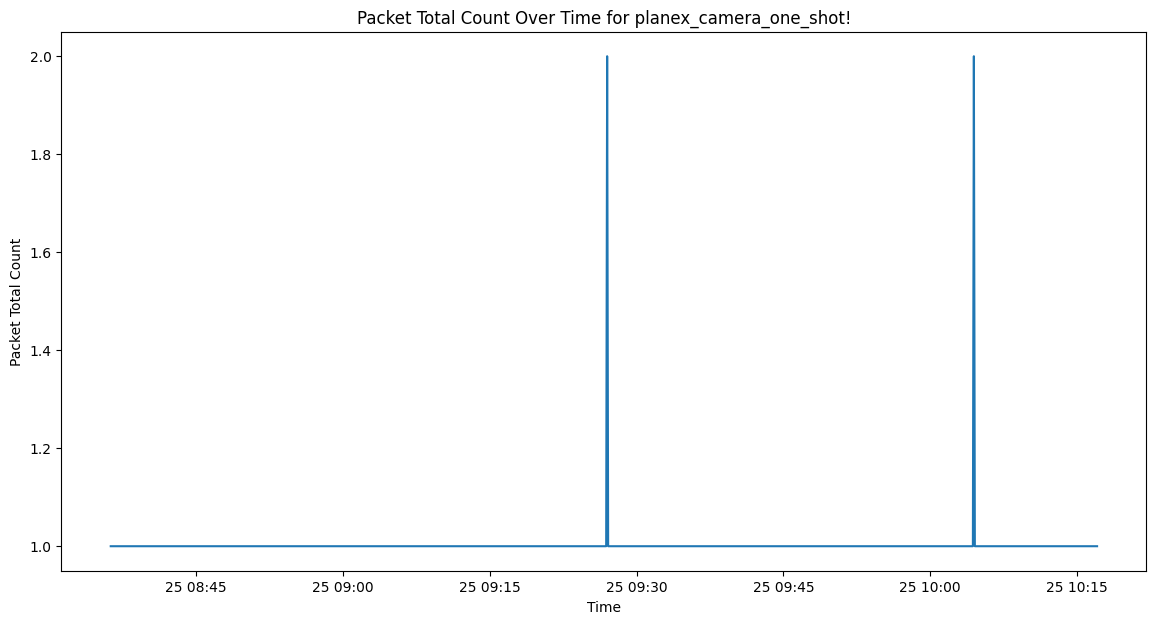

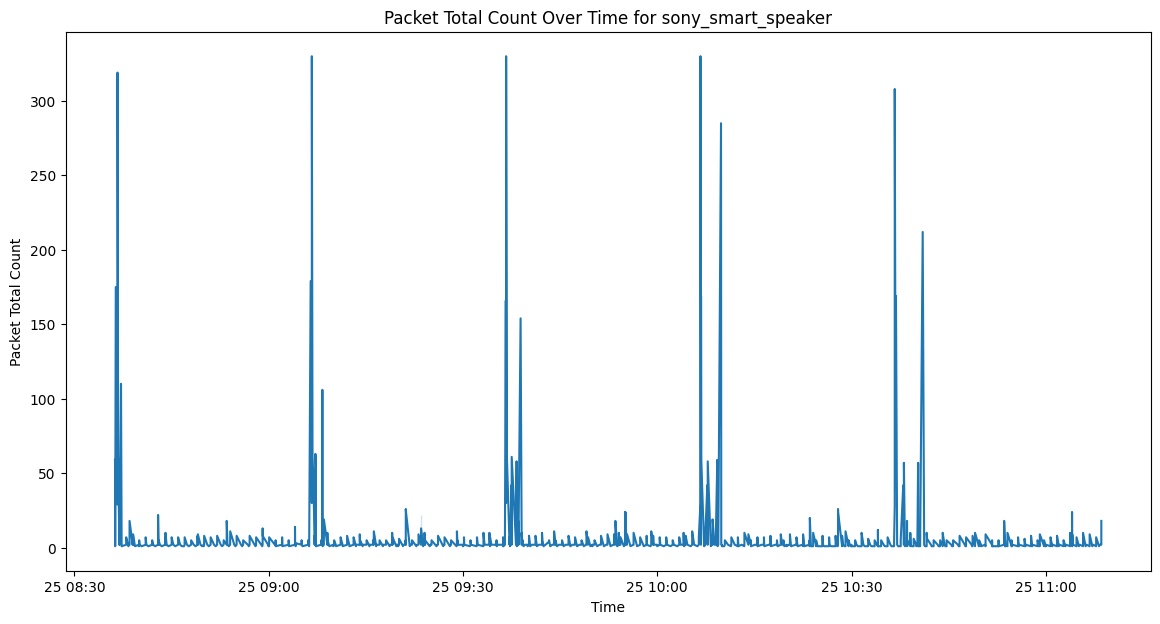

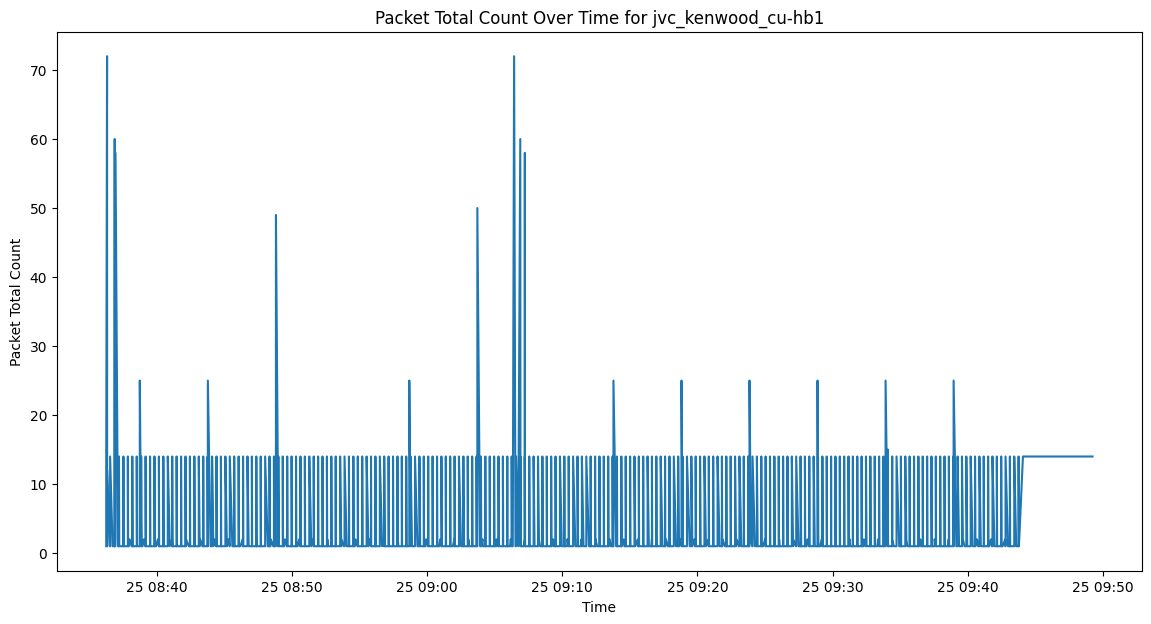

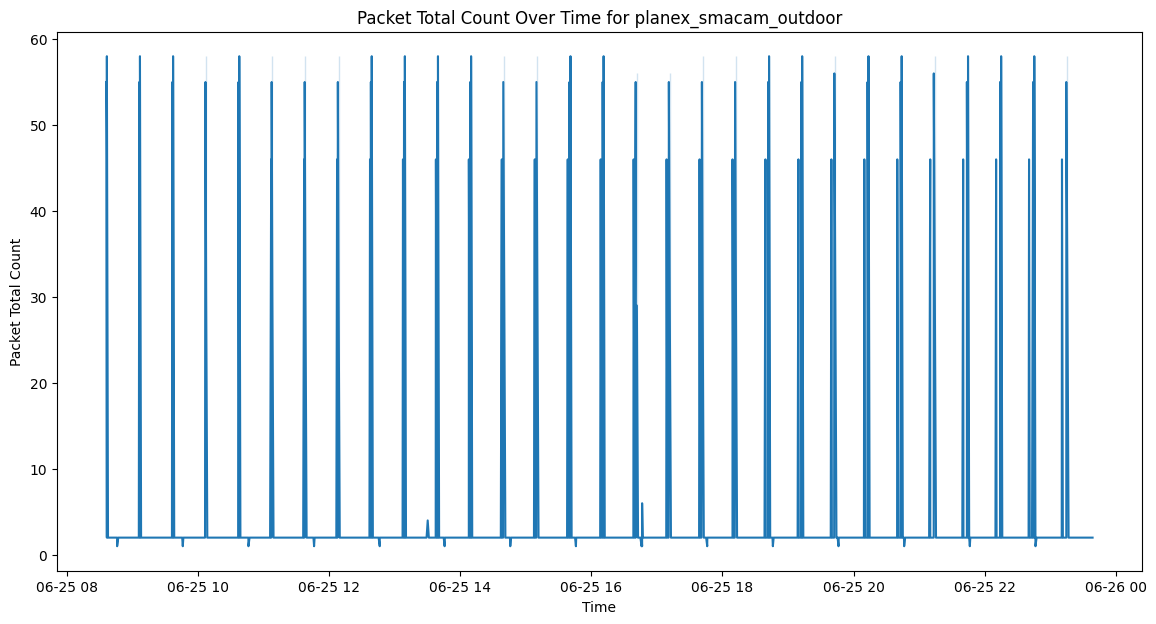

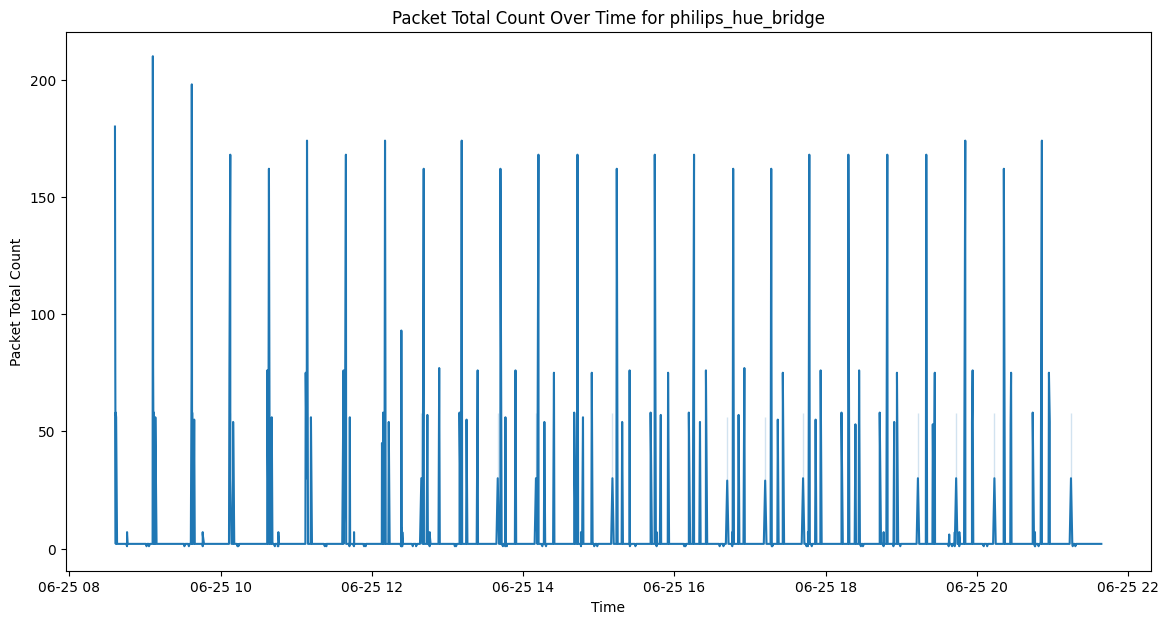

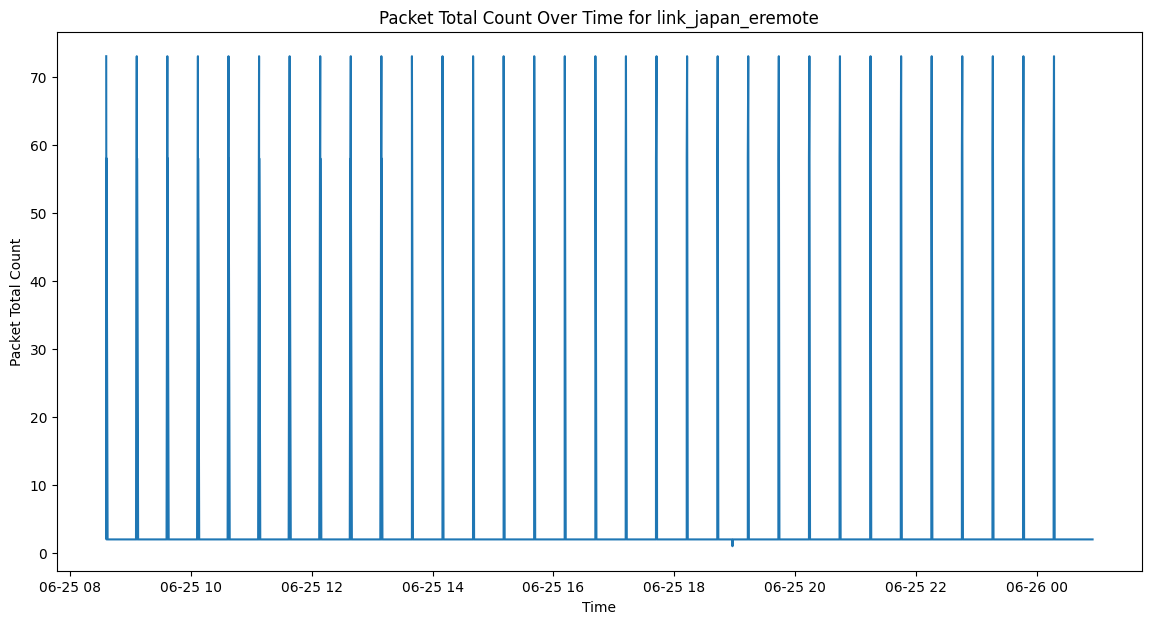

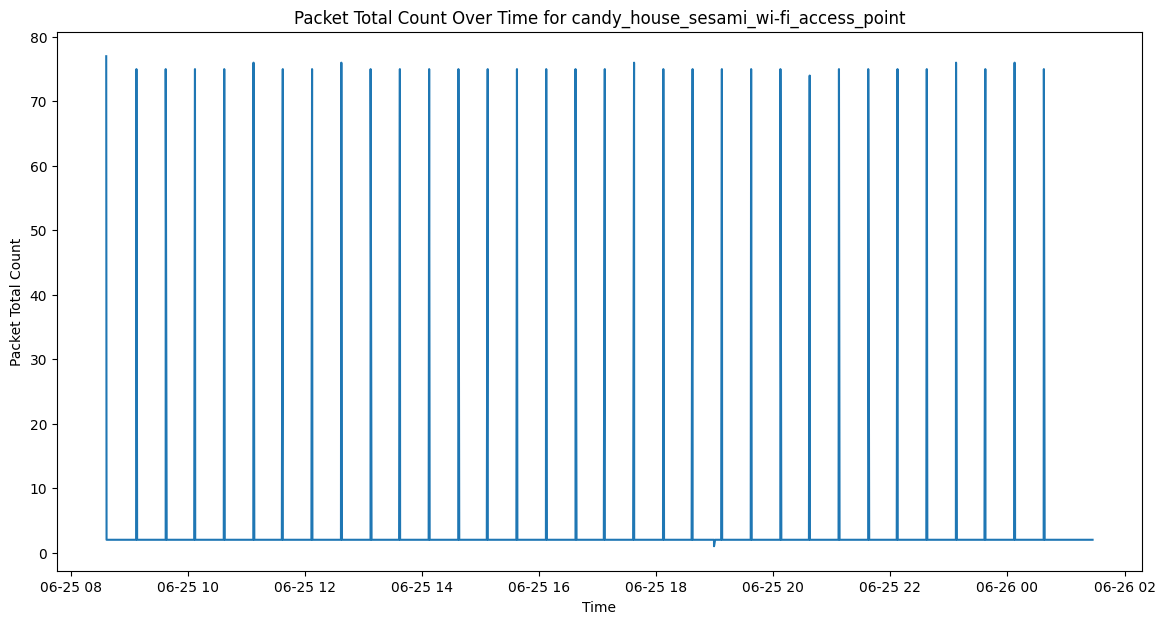

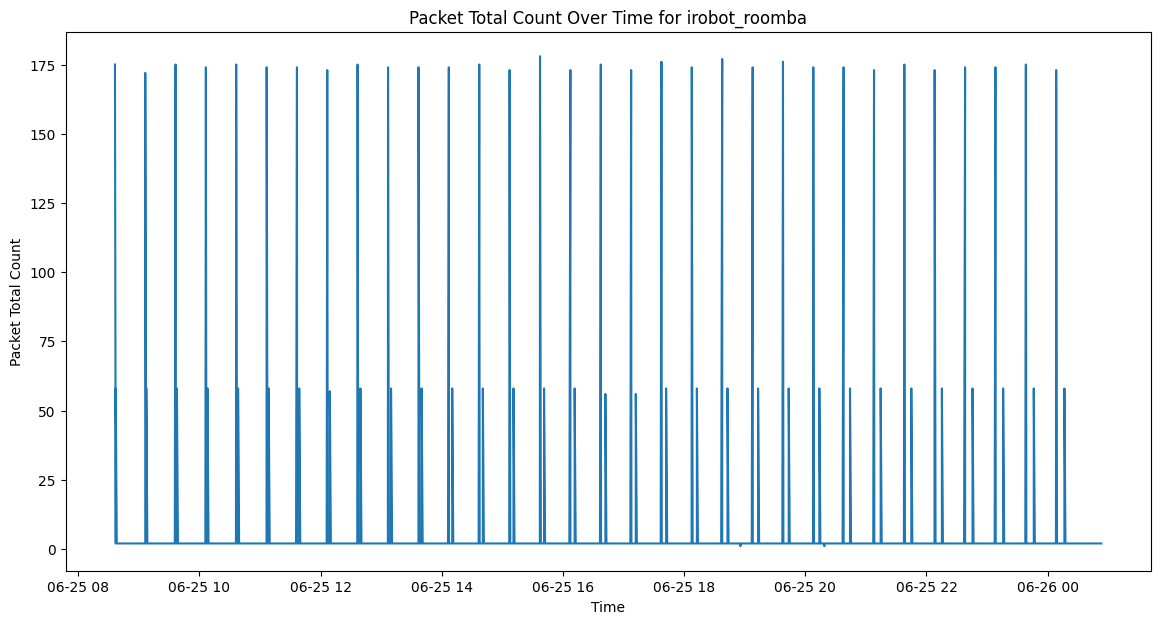

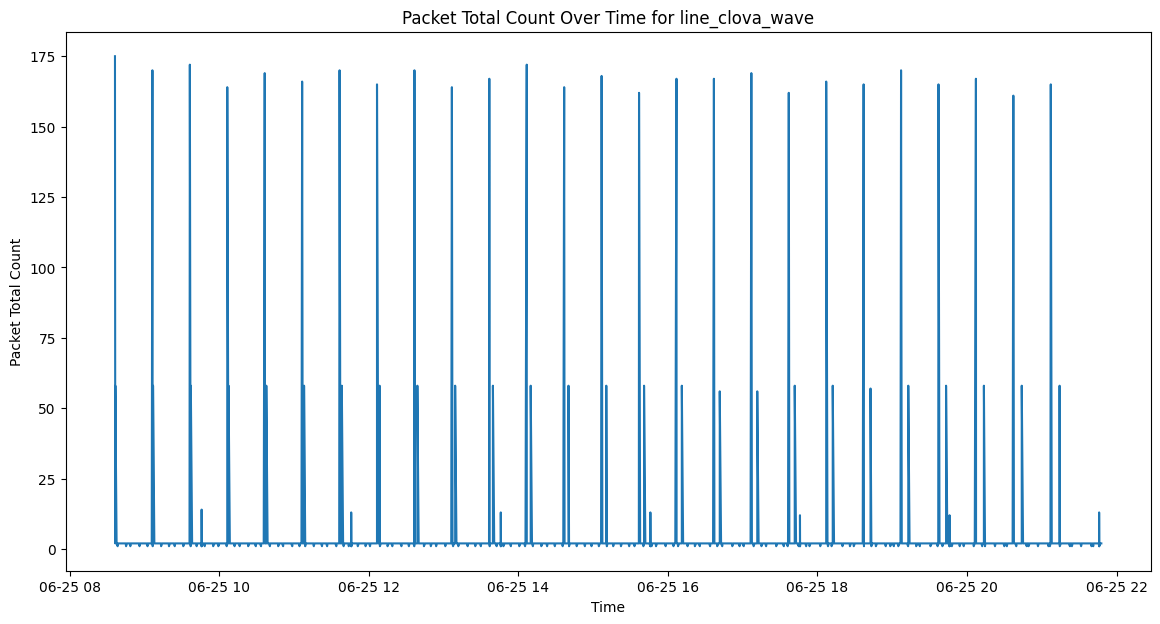

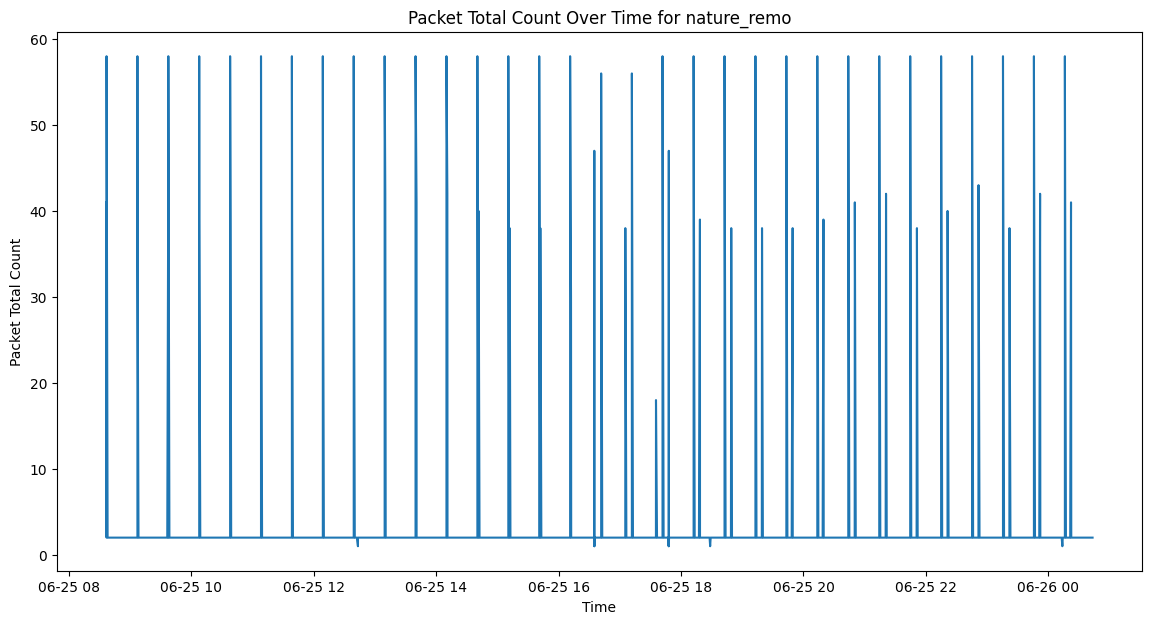

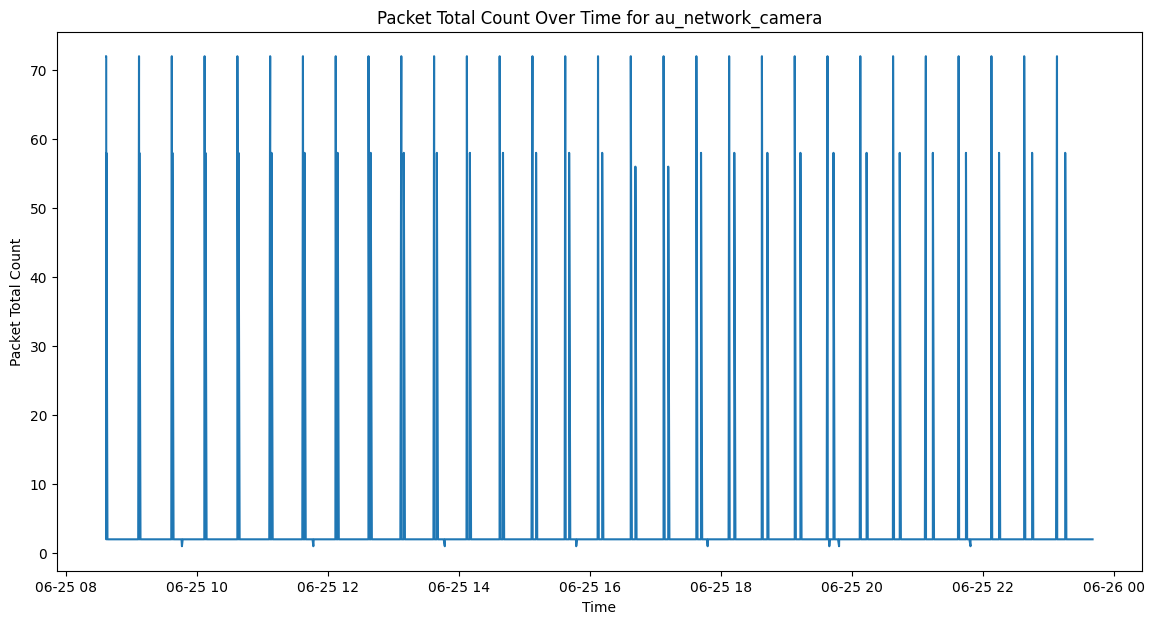

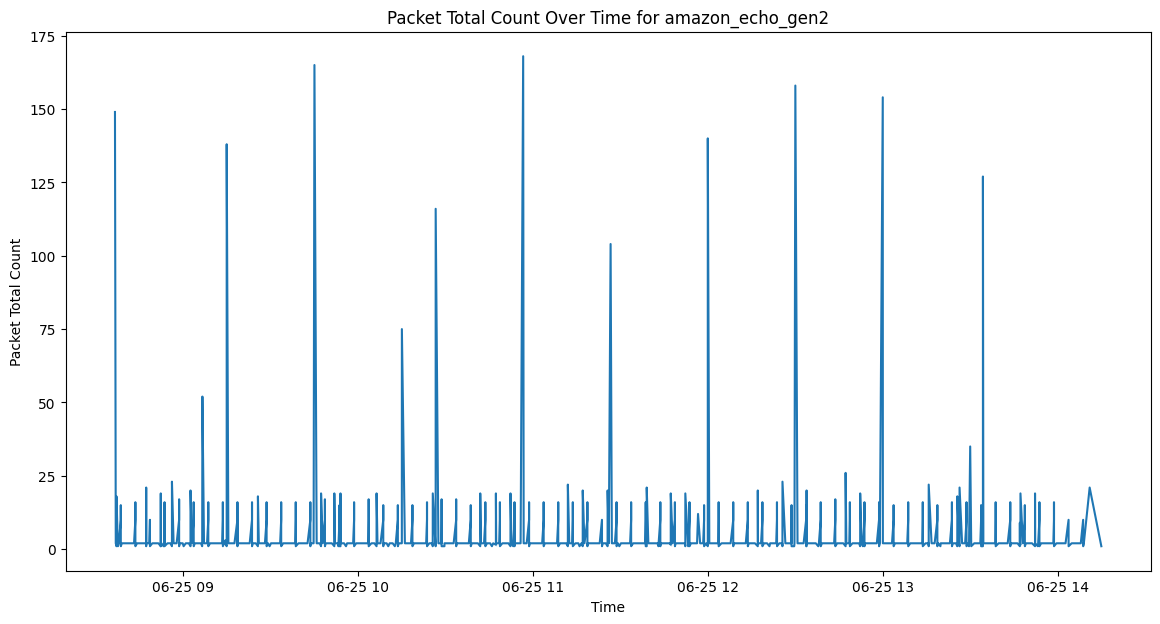

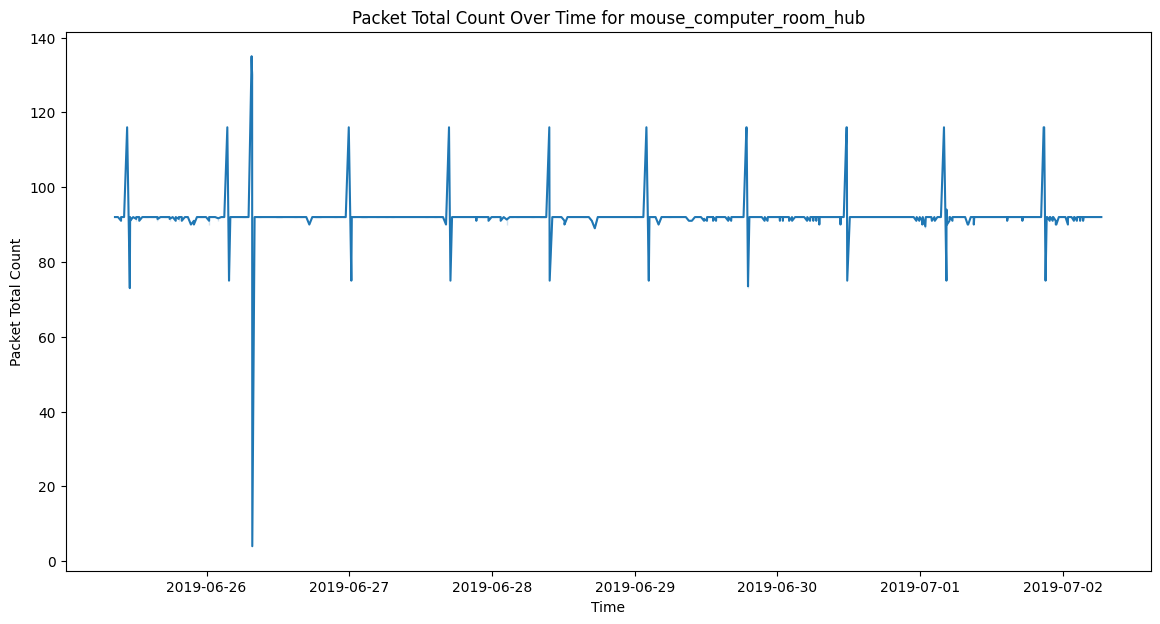

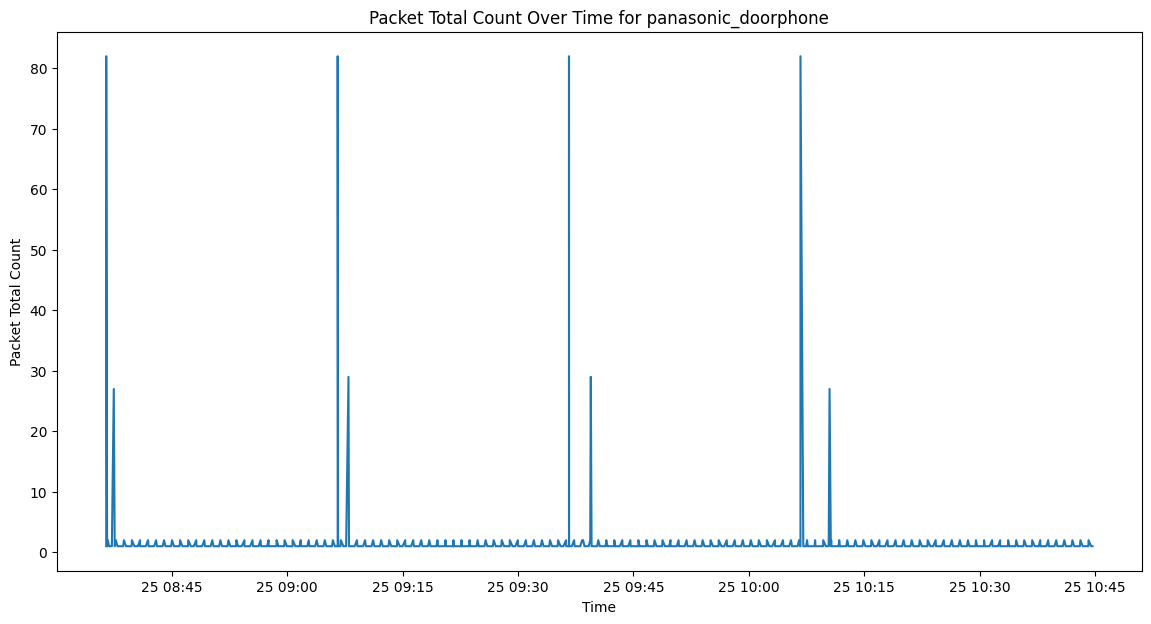

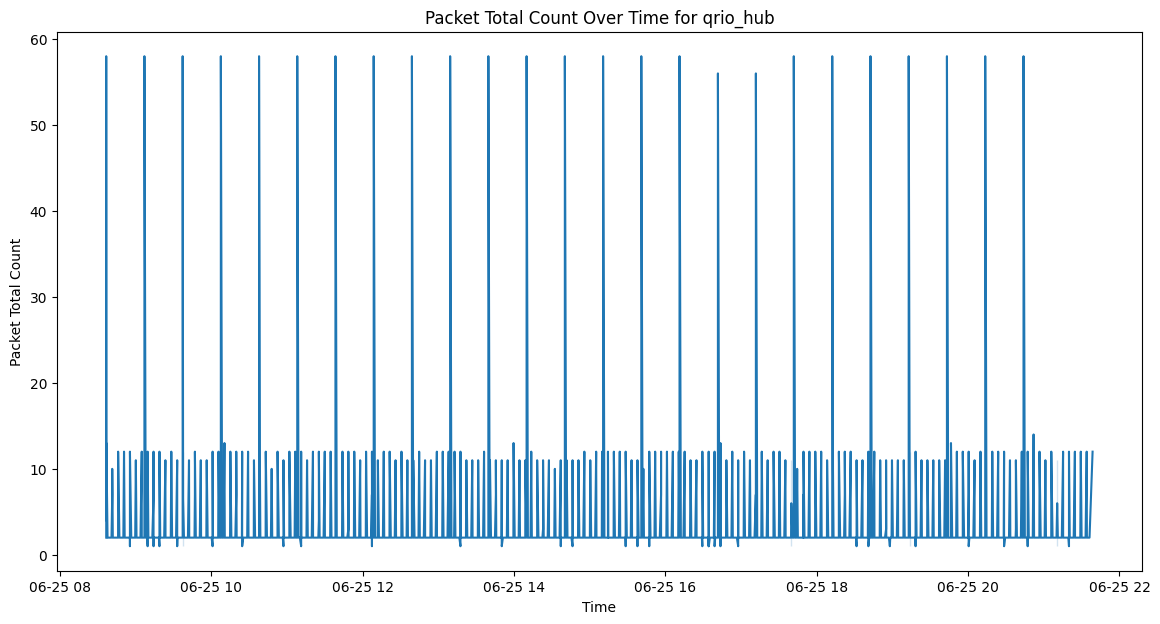

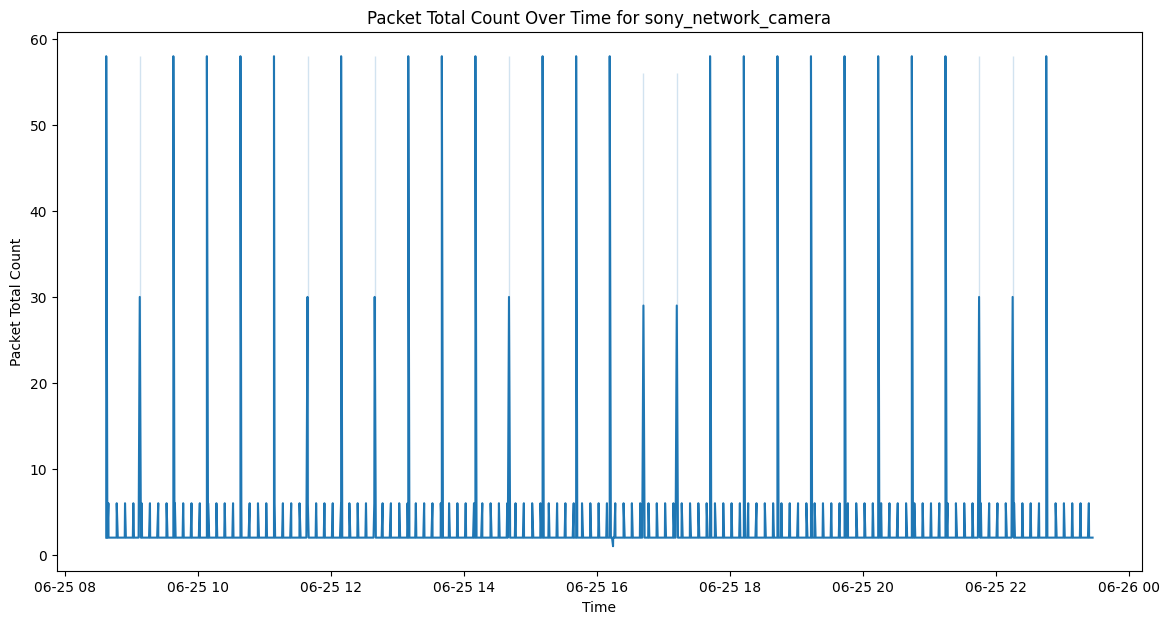

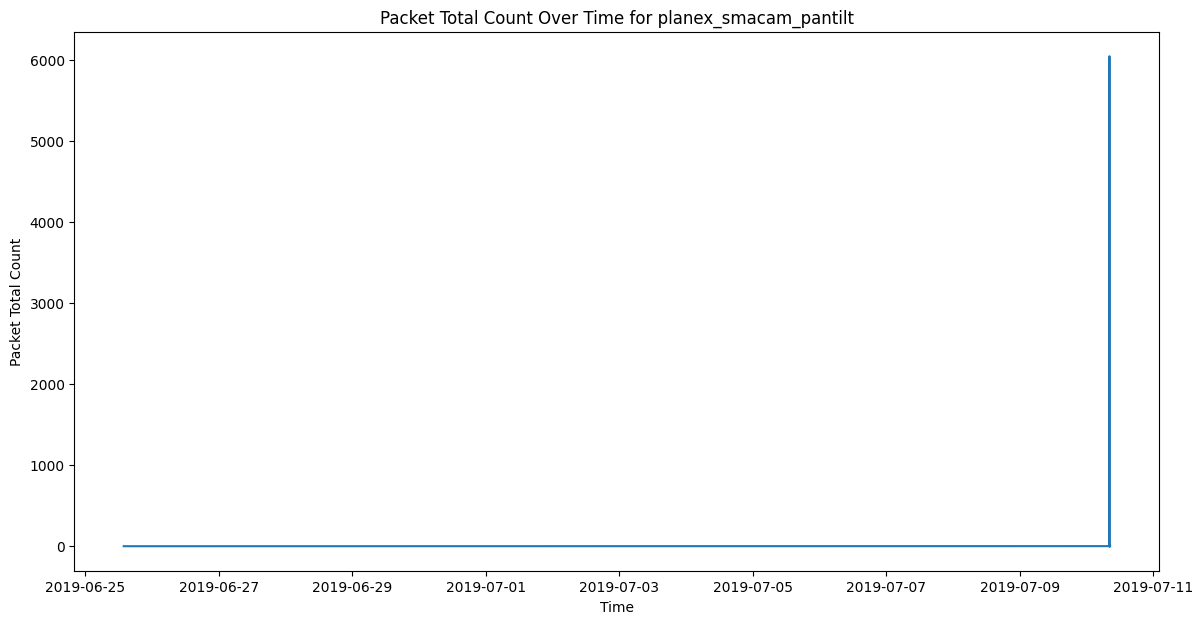

In [12]:
# Get the unique device names in the DataFrame
unique_devices = df['Device'].unique()

# Loop through each unique device and create a separate plot
for device in unique_devices:
    # Filter the DataFrame for the current device
    device_df = df[df['Device'] == device]

    # Create a line plot for packetTotalCount for the current device
    plt.figure(figsize=(14,7))
    sns.lineplot(data=device_df, x=device_df.index, y='packetTotalCount')
    plt.title(f'Packet Total Count Over Time for {device}')
    plt.xlabel('Time')
    plt.ylabel('Packet Total Count')
    plt.show()